<a href="https://colab.research.google.com/github/ec18473/Learn/blob/master/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
from google.colab import drive
drive.mount('/content/gdrive')
import subprocess


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Objective : Analyze IoT sensor data

**This code pattern demonstrates the use of Jupyter notebooks to interact with IoT sensor data generated using a python script. It goes through steps from the creation of database objects to advanced analytics and machine learning model development and deployment.**






#Step 1 : Generate the data
This repository includes a generated sample IoT dataset in CSV format that contains user generated records. 

Alternatively, a CSV dataset containing a user-specified number of records can be generated with the provided Python script at data/generator.py. A Python environment with pandas and NumPy installed is required to run the script.


In [0]:
#Change the given arguements "-c 1000" to the required number of samples data to be gererated 
!python gdrive/My\ Drive/Colab\ Notebooks/generator.py -c 1






Pandas DataFrames is generally used for representing Excel Like Data In-Memory. In all probability, most of the time, we’re going to load the data from a persistent storage, which could be a DataBase or a CSV file.

In [0]:
#Coverting the gnerated csv into dataframe with the definede columns.
sensor_data = pd.read_csv("sample_IOT_table.csv",names=['DEVICE_ID','SENSOR_ID','TIMESTAMP','ENV_TEMP','POWER','TEMP']) 


In [0]:
#head() displays the first 5 records of the dataset
sensor_data.head()

,DEVICE_ID,SENSOR_ID,TIMESTAMP,ENV_TEMP,POWER,TEMP
0,1,48,1541019342393,25.983183,14.658741,48.908846


In [0]:
#count() displays the list of records under each attribute
sensor_data.count()

DEVICE_ID    1
SENSOR_ID    1
TIMESTAMP    1
ENV_TEMP     1
POWER        1
TEMP         1
dtype: int64

#Step 2 : Understanding the relationship between the data
In simple words, both the terms measure the relationship and the dependency between two variables. “Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance. What sets them apart is the fact that correlation values are standardized whereas, covariance values are not. You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values. If we revisit the definition of Standard Deviation, it essentially measures the absolute variability of a datasets’ distribution. When you divide the covariance values by the standard deviation, it essentially scales the value down to a limited range of -1 to +1. This is precisely the range of the correlation values.

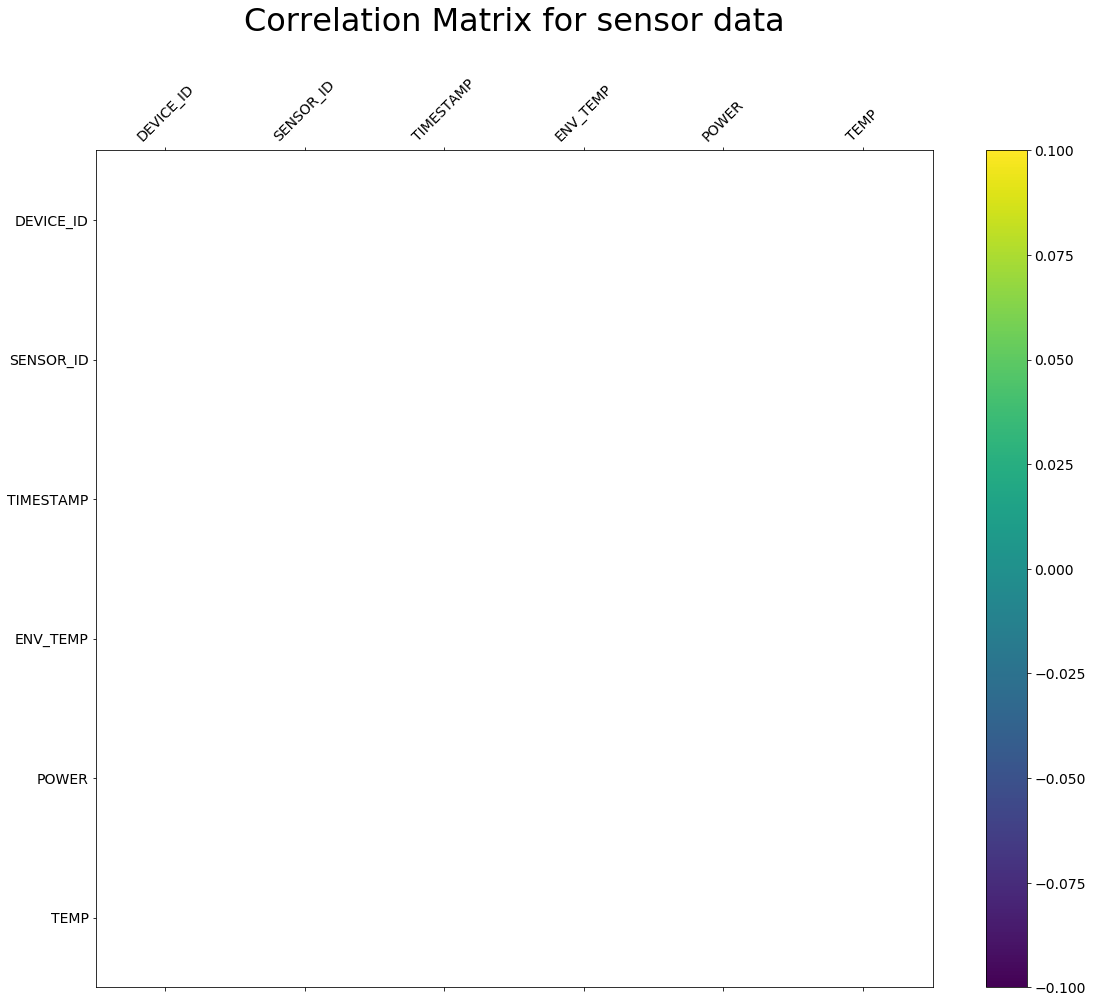

In [0]:
f = plt.figure(figsize=(19, 15))
plt.matshow(sensor_data.corr(), fignum=f.number)
plt.xticks(range(sensor_data.shape[1]), sensor_data.columns, fontsize=14, rotation=45)
plt.yticks(range(sensor_data.shape[1]), sensor_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix for sensor data\n\n', fontsize=32);

#Covariance : 
In probability theory and statistics, covariance is a measure of the joint variability of two random variables.If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior),the covariance is positive.In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. The sign of the covariance therefore shows the tendency in the linear relationship between the variables. The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.

#Covariance : 

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

Explaining Correlation:
A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one security moves, either up or down, the other security moves in lockstep, in the same direction. A perfect negative correlation means that two assets move in opposite directions, while a zero correlation implies no relationship at all.



In [0]:
#Covariance between the attributes
sensor_data.cov()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7654: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,DEVICE_ID,SENSOR_ID,TIMESTAMP,ENV_TEMP,POWER,TEMP
DEVICE_ID,NaN,NaN,NaN,NaN,NaN,NaN
SENSOR_ID,NaN,NaN,NaN,NaN,NaN,NaN
TIMESTAMP,NaN,NaN,NaN,NaN,NaN,NaN
ENV_TEMP,NaN,NaN,NaN,NaN,NaN,NaN
POWER,NaN,NaN,NaN,NaN,NaN,NaN
TEMP,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print('1.Covariance between ambient temperature and measured temperature  :',sensor_data.ENV_TEMP.cov(sensor_data.TEMP))
print('2.Covariance between power and measured temperature                :',sensor_data.POWER.cov(sensor_data.TEMP))
print('3.Correlation between ambient temperature and measured temperature :',sensor_data.ENV_TEMP.corr(sensor_data.TEMP))
print('4.Correlation between power and measured temperature               :',sensor_data.POWER.corr(sensor_data.TEMP))


1.Covariance between ambient temperature and measured temperature  : nan
2.Covariance between power and measured temperature                : nan
3.Correlation between ambient temperature and measured temperature : nan
4.Correlation between power and measured temperature               : nan


/usr/local/lib/python3.6/dist-packages/pandas/core/nanops.py:1287: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b)[0, 1]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)


#STEP 3: VISUALISATION 
Visualization of each feature provides insights into the underlying distributions.


/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0.5, 1.0, 'Histogram on Ambient_temp/Env_Temp')

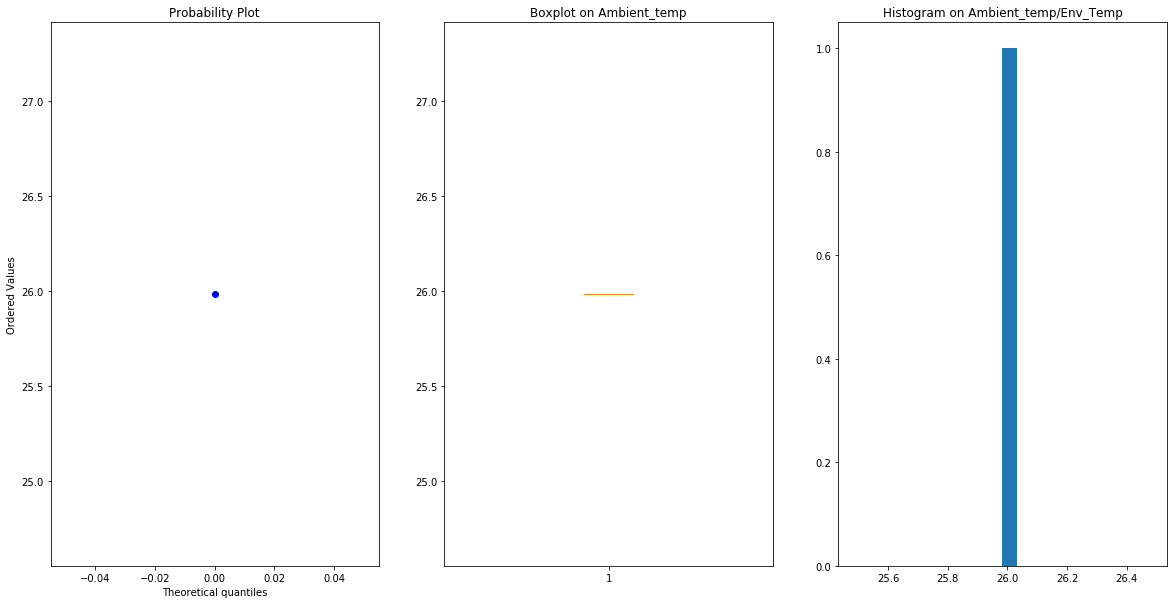

In [0]:
fig, axs = plt.subplots(1,3, figsize=(20,10))


stats.probplot(sensor_data.ENV_TEMP, plot=plt.subplot(1,3,1))

axs[1].boxplot(sensor_data.ENV_TEMP)
axs[1].set_title("Boxplot on Ambient_temp")
axs[2].hist(sensor_data.ENV_TEMP, bins = 20)
axs[2].set_title("Histogram on Ambient_temp/Env_Temp")


/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0.5, 1.0, 'Histogram on Power')

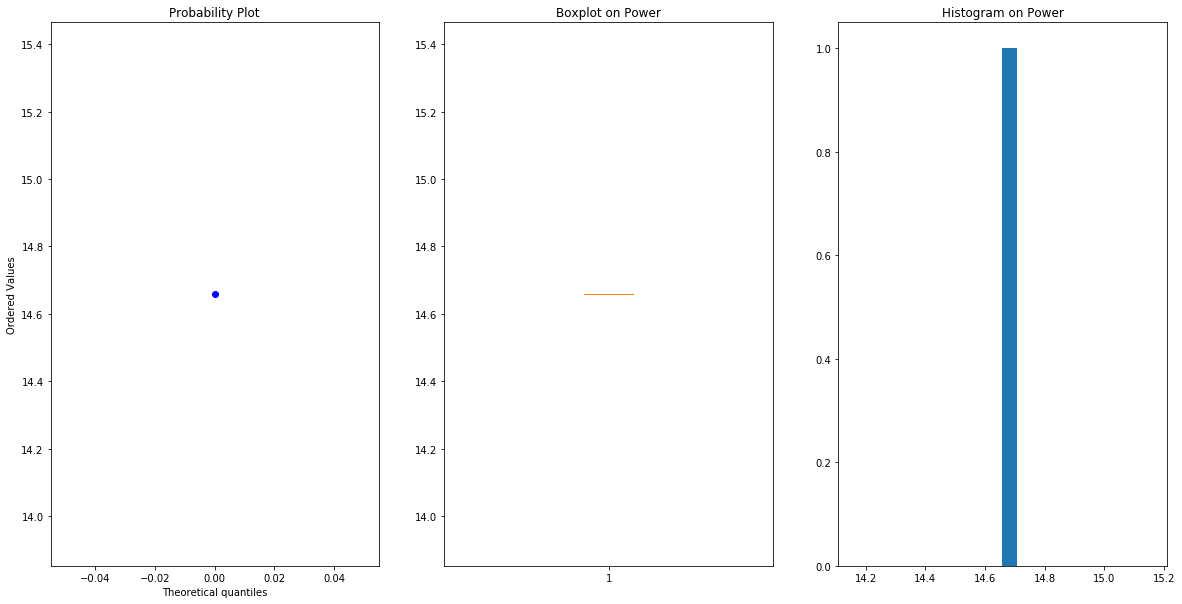

In [0]:
fig, axs = plt.subplots(1,3, figsize=(20,10))


stats.probplot(sensor_data.POWER, plot=plt.subplot(1,3,1))

axs[1].boxplot(sensor_data.POWER)
axs[1].set_title("Boxplot on Power")
axs[2].hist(sensor_data.POWER, bins = 20)
axs[2].set_title("Histogram on Power")

/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0.5, 1.0, 'Histogram on SENSOR TEMPERATURE')

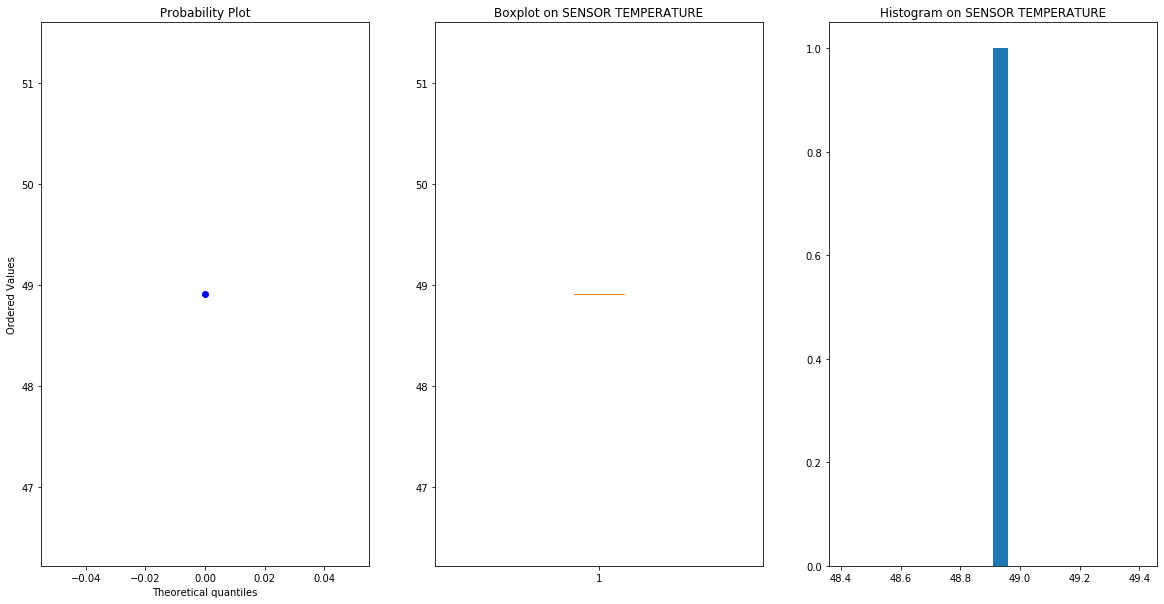

In [0]:
fig, axs = plt.subplots(1,3, figsize=(20,10))


stats.probplot(sensor_data.TEMP, plot=plt.subplot(1,3,1))

axs[1].boxplot(sensor_data.TEMP)
axs[1].set_title("Boxplot on SENSOR TEMPERATURE")
axs[2].hist(sensor_data.TEMP, bins = 20)
axs[2].set_title("Histogram on SENSOR TEMPERATURE")

Text(0.5, 1.0, 'Ambient_temp  vs. Sensor Temperature')

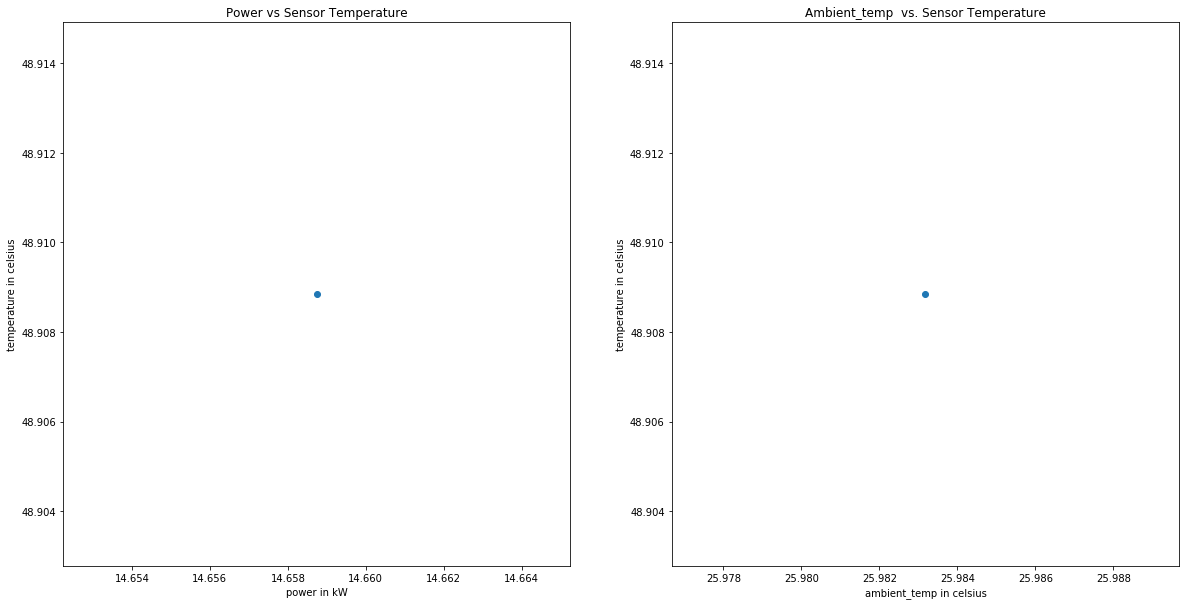

In [0]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
axs[0].scatter(sensor_data.POWER, sensor_data.TEMP)
axs[0].set_xlabel("power in kW")
axs[0].set_ylabel("temperature in celsius")
axs[0].set_title("Power vs Sensor Temperature")
axs[1].scatter(sensor_data.ENV_TEMP, sensor_data.TEMP)
axs[1].set_xlabel("ambient_temp in celsius")
axs[1].set_ylabel("temperature in celsius")
axs[1].set_title("Ambient_temp  vs. Sensor Temperature")

#SUMMARY

By observing the plots above, we noticed:

The distribution of power consumption, ambient temperature, and sensor temperature each follows an roughly normal distribution.
The scatter plot shows the sensor temperature has linear relationships with power consumption and ambient temperature.